## Epoching Subjects

In [206]:
import mne
import sys
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib as plt
%matplotlib notebook
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

### Subject 1 (Female/Neutral Stimulus)

In [207]:
subj1_raw = mne.io.read_raw_fif('subj1_exp1_female_neutral_filtered.fif', preload = True)
print(subj1_raw.info) # no event data contained in raw object

Opening raw data file subj1_exp1_female_neutral_filtered.fif...
    Range : 0 ... 754924 =      0.000 ...  1509.848 secs
Ready.
Reading 0 ... 754924  =      0.000 ...  1509.848 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\1168138746.py:1: RuntimeWarning: This filename (subj1_exp1_female_neutral_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj1_raw = mne.io.read_raw_fif('subj1_exp1_female_neutral_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 50 EEG, 3 misc
 custom_ref_applied: True
 dig: 53 items (3 Cardinal, 50 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 53
 projs: []
 sfreq: 500.0 Hz
>


In [208]:
# need to find event information
events1, event1_id = mne.events_from_annotations(subj1_raw) # 2.24 seconds between events - epoch to the SCD
print(events1) # 961 events detected
print(event1_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  5', 'S  7', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S105', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'boundary']
[[     0      0     50]
 [134411      0     46]
 [135535      0     39]
 [135734      0      7]
 [136770      0     48]
 [137918      0     41]
 [138127      0      8]
 [139162      0     44]
 [139644      0     42]
 [139928      0      8]
 [140963      0     47]
 [142996      0     43]
 [143256      0      6]
 [144290      0     44]
 [144848      0     39]
 [145132      0      7]
 [146167      0     45]
 [147018      0     39]
 [147234      0      7]
 [148268      0     49]
 [148770      0     40]
 [148985      0      7]
 [150020      0     47]
 [150606    

In [209]:
subj1_events_raw = pd.read_csv('sub-001_eeg_sub-001_task-PST_events.tsv', sep='\t', header=0)
events1 = events1[subj1_events_raw['trial_type'].str.contains("STIM:") == True]

In [210]:
subj1_epochs = mne.Epochs(subj1_raw, events1, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


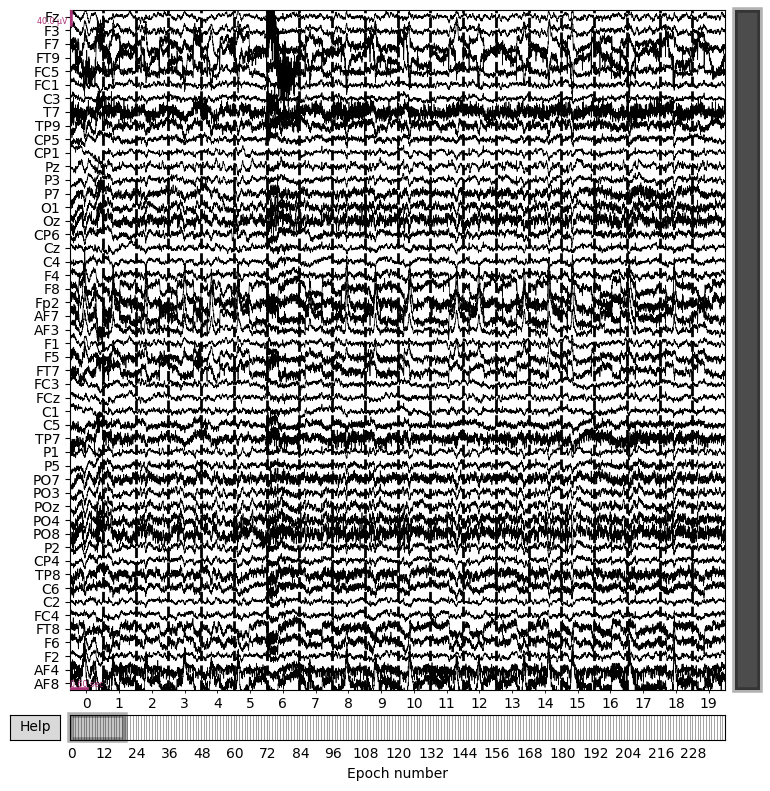

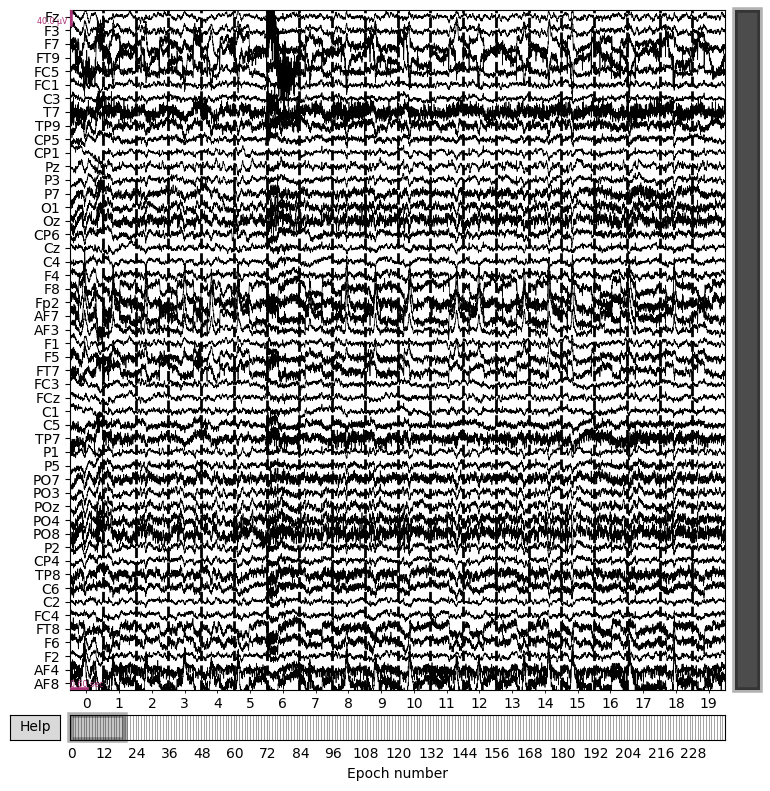

In [211]:
subj1_epochs.plot(n_channels=50, block=True)

### Subject 2 (Male/Neutral Stimulus)

In [212]:
subj2_raw = mne.io.read_raw_fif('subj2_exp1_male_neutral_filtered.fif', preload = True)
print(subj2_raw.info) # no event data contained in raw object

Opening raw data file subj2_exp1_male_neutral_filtered.fif...
    Range : 0 ... 711649 =      0.000 ...  1423.298 secs
Ready.
Reading 0 ... 711649  =      0.000 ...  1423.298 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\1391959541.py:1: RuntimeWarning: This filename (subj2_exp1_male_neutral_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj2_raw = mne.io.read_raw_fif('subj2_exp1_male_neutral_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 50 EEG, 3 misc
 custom_ref_applied: True
 dig: 53 items (3 Cardinal, 50 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 53
 projs: []
 sfreq: 500.0 Hz
>


In [213]:
# need to find event information
events2, event2_id = mne.events_from_annotations(subj2_raw) # 2.24 seconds between events - epoch to the SCD
print(events2) # 961 events detected
print(event2_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'boundary']
[[     0      0     47]
 [127303      0     45]
 [128094      0     39]
 [128284      0      5]
 [129320      0     43]
 [130001      0     37]
 [130260      0      5]
 [131295      0     46]
 [131951      0     38]
 [132195      0      5]
 [133230      0     42]
 [134257      0     37]
 [134439      0      5]
 [135473      0     41]
 [136269      0     40]
 [136457      0      6]
 [137491      0     44]
 [138339      0     38]
 [138550      0      5]
 [139584      0     44]
 [140509      0     38]
 [140718      0      5]
 [141753      0     45]
 [142559      0     39]
 [142753    

In [214]:
subj2_events_raw = pd.read_csv('sub-002_eeg_sub-002_task-PST_events.tsv', sep='\t', header=0)
subj2_events_raw = subj2_events_raw[subj2_events_raw['trial_type'].str.contains("STATUS") == False]
subj2_events_raw.drop(subj2_events_raw.tail(5).index, inplace=True)
events2 = events2[subj2_events_raw['trial_type'].str.contains("STIM:") == True]

In [215]:
subj2_epochs = mne.Epochs(subj2_raw, events2, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


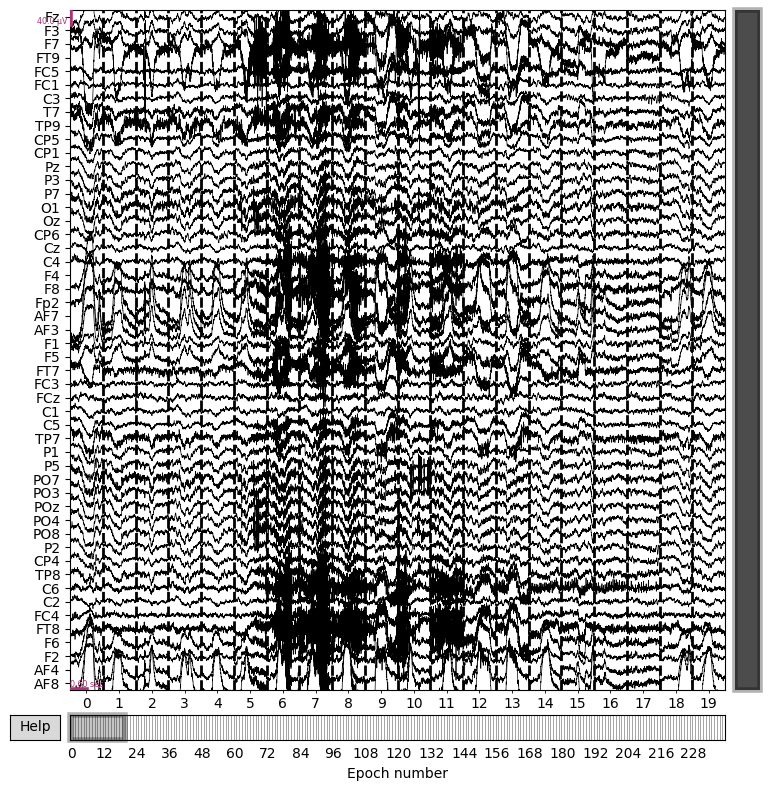

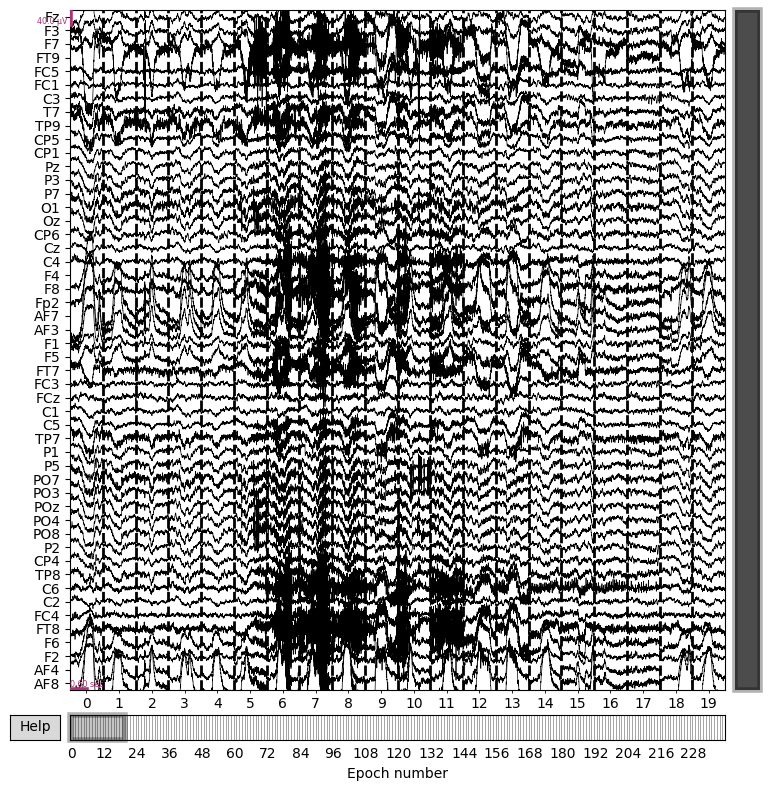

In [216]:
subj2_epochs.plot(n_channels=50, block=True)

### Subject 3 (Female/Sad Stimulus)

In [217]:
subj3_raw = mne.io.read_raw_fif('subj3_exp1_female_sad_filtered.fif', preload = True)
print(subj3_raw.info) # no event data contained in raw object

Opening raw data file subj3_exp1_female_sad_filtered.fif...
    Range : 0 ... 632449 =      0.000 ...  1264.898 secs
Ready.
Reading 0 ... 632449  =      0.000 ...  1264.898 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\2517505839.py:1: RuntimeWarning: This filename (subj3_exp1_female_sad_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj3_raw = mne.io.read_raw_fif('subj3_exp1_female_sad_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 50 EEG, 3 misc
 custom_ref_applied: True
 dig: 53 items (3 Cardinal, 50 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 53
 projs: []
 sfreq: 500.0 Hz
>


In [218]:
# need to find event information
events3, event3_id = mne.events_from_annotations(subj3_raw) # 2.24 seconds between events - epoch to the SCD
print(events3) # 961 events detected
print(event3_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  5', 'S  7', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S105', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'boundary']
[[     0      0     50]
 [109968      0     45]
 [110801      0     42]
 [111023      0      7]
 [112059      0     47]
 [113183      0     40]
 [113425      0      7]
 [114460      0     49]
 [115033      0     41]
 [115301      0      8]
 [116336      0     44]
 [116537      0     39]
 [116761      0      7]
 [117795      0     48]
 [118077      0     40]
 [118262      0      7]
 [119296      0     46]
 [119690      0     42]
 [119963      0      8]
 [120998      0     45]
 [121210      0     39]
 [121481      0      7]
 [122516      0     46]
 [122686    

In [219]:
subj3_events_raw = pd.read_csv('sub-003_eeg_sub-003_task-PST_events.tsv', sep='\t', header=0)
subj3_events_raw.drop(subj3_events_raw.tail(9).index, inplace=True)
events3 = events3[subj3_events_raw['trial_type'].str.contains("STIM:") == True]

In [220]:
subj3_epochs = mne.Epochs(subj3_raw, events3, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


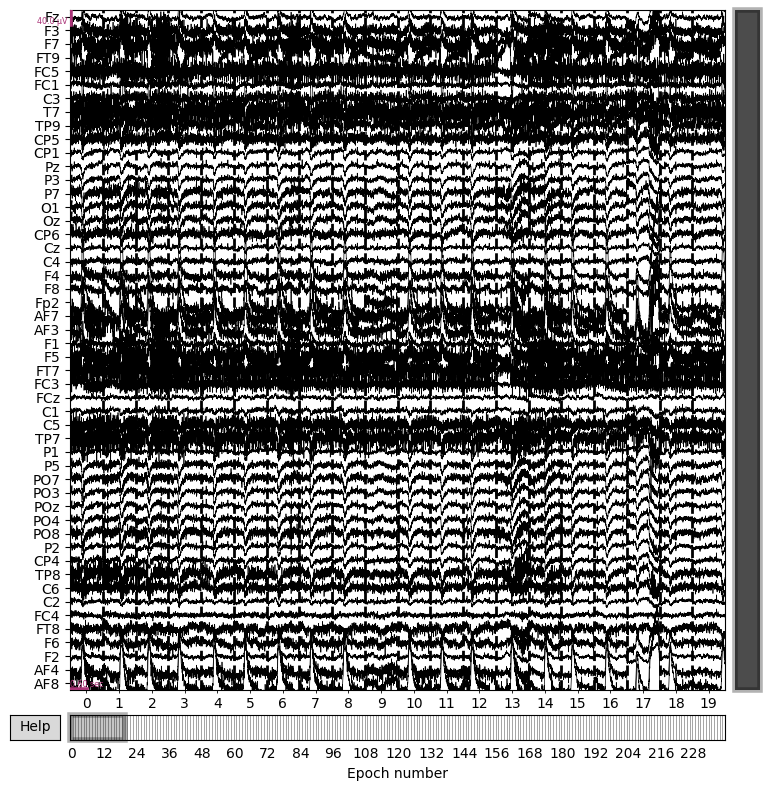

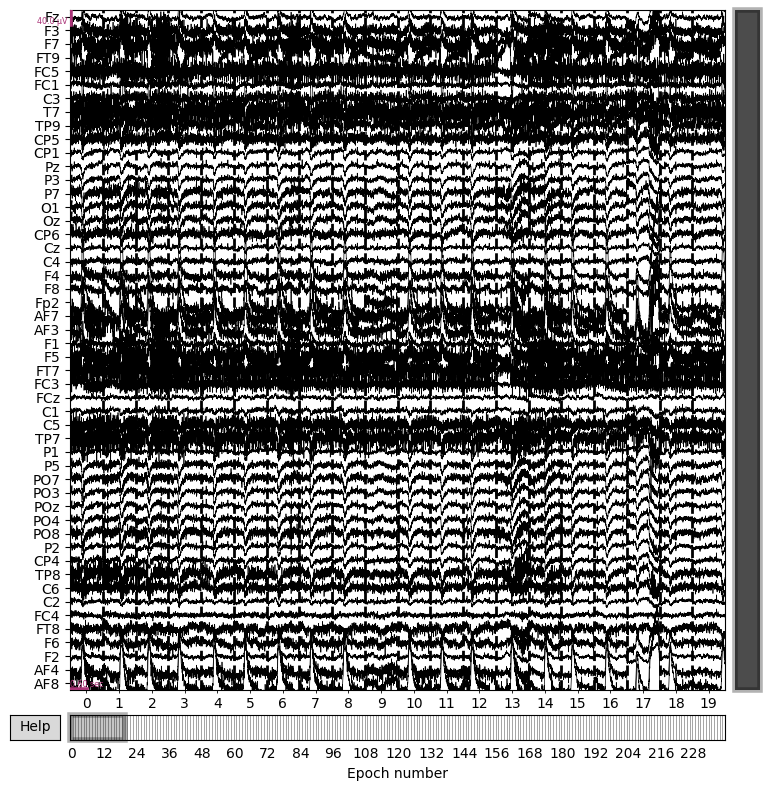

In [221]:
subj3_epochs.plot(n_channels=50, block=True)

In [ ]:
subj1_epochs.save()

### Subject 4 (Male/Sad Stimulus)

In [222]:
subj4_raw = mne.io.read_raw_fif('subj4_exp1_male_sad_filtered.fif', preload = True)
print(subj4_raw.info) # no event data contained in raw object

Opening raw data file subj4_exp1_male_sad_filtered.fif...
    Range : 0 ... 719474 =      0.000 ...  1438.948 secs
Ready.
Reading 0 ... 719474  =      0.000 ...  1438.948 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\173034981.py:1: RuntimeWarning: This filename (subj4_exp1_male_sad_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj4_raw = mne.io.read_raw_fif('subj4_exp1_male_sad_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 50 EEG, 3 misc
 custom_ref_applied: True
 dig: 53 items (3 Cardinal, 50 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 53
 projs: []
 sfreq: 500.0 Hz
>


In [223]:
# need to find event information
events4, event4_id = mne.events_from_annotations(subj4_raw) # 2.24 seconds between events - epoch to the SCD
print(events4) # 961 events detected
print(event4_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'boundary']
[[     0      0     47]
 [120888      0     45]
 [121556      0     39]
 [121769      0      5]
 [122805      0     43]
 [123548      0     40]
 [123804      0      6]
 [124838      0     41]
 [125460      0     40]
 [125680      0      6]
 [126714      0     41]
 [127418      0     37]
 [127682      0      5]
 [128716      0     44]
 [129416      0     39]
 [129625      0      5]
 [130659      0     45]
 [131588      0     38]
 [131826      0      5]
 [132861      0     41]
 [134314      0     37]
 [134570      0      5]
 [135605      0     44]
 [136494      0     39]
 [136780    

In [224]:
subj4_events_raw = pd.read_csv('sub-004_eeg_sub-004_task-PST_events.tsv', sep='\t', header=0)
events4 = events4[subj4_events_raw['trial_type'].str.contains("STIM:") == True]

In [225]:
subj4_epochs = mne.Epochs(subj1_raw, events4, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


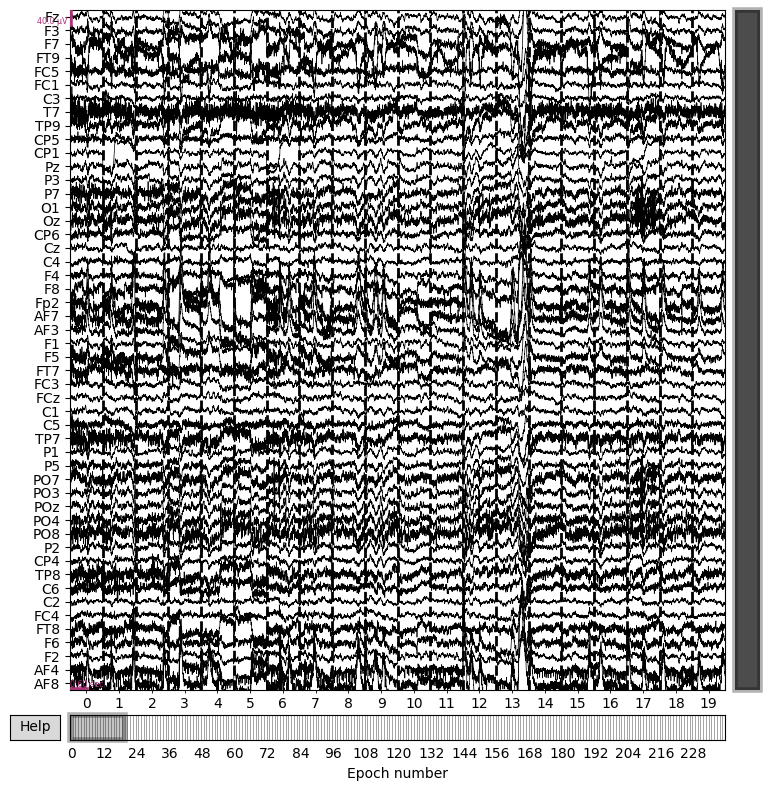

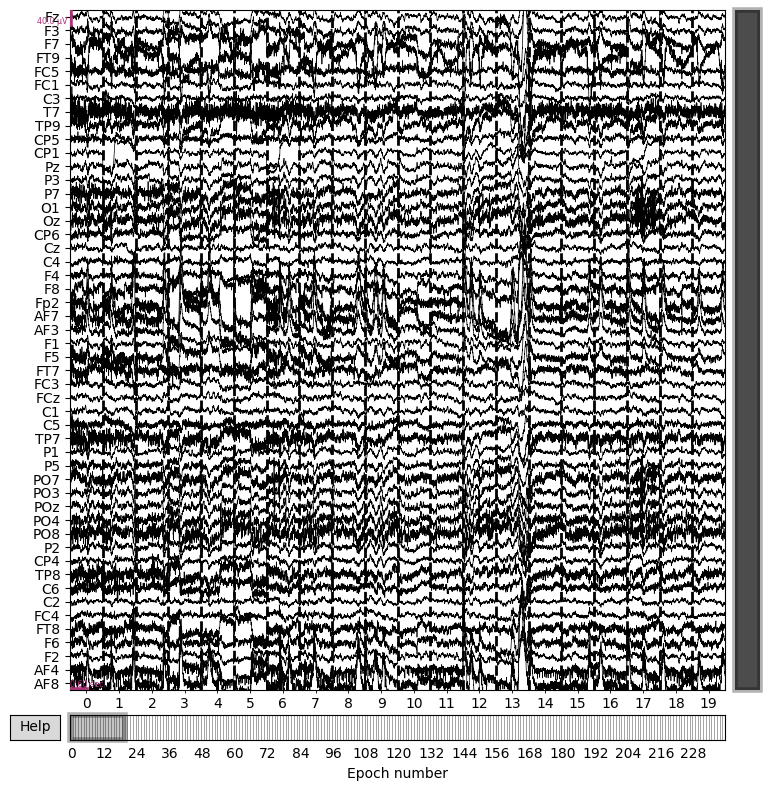

In [226]:
subj4_epochs.plot(n_channels=50, block=True)

### Subject 5 (Female/Happy Stimulus)

In [227]:
subj5_raw = mne.io.read_raw_fif('subj6_exp2_female_happy_filtered.fif', preload = True)
print(subj5_raw.info) # no event data contained in raw object

Opening raw data file subj6_exp2_female_happy_filtered.fif...
    Range : 0 ... 1577549 =      0.000 ...  3155.098 secs
Ready.
Reading 0 ... 1577549  =      0.000 ...  3155.098 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\2697645661.py:1: RuntimeWarning: This filename (subj6_exp2_female_happy_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj5_raw = mne.io.read_raw_fif('subj6_exp2_female_happy_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, Below Eye, FC5, FC1, C3, T7, Left Mastoid, CP5, CP1, ...
 chs: 48 EEG, 7 misc
 custom_ref_applied: True
 dig: 51 items (3 Cardinal, 48 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 55
 projs: []
 sfreq: 500.0 Hz
>


In [228]:
# need to find event information
events5, event5_id = mne.events_from_annotations(subj5_raw) # 2.24 seconds between events - epoch to the SCD
print(events5) # 961 events detected
print(event5_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  5', 'S  7', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S105', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'S201', 'S202', 'S203', 'S204', 'S205', 'boundary']
[[      0       0      55]
 [ 311503       0      50]
 [ 387282       0      54]
 [ 408342       0      44]
 [ 410184       0      39]
 [ 410368       0       7]
 [ 411395       0      46]
 [ 412058       0      42]
 [ 412270       0       7]
 [ 413299       0      45]
 [ 413914       0      39]
 [ 414131       0       7]
 [ 415159       0      47]
 [ 415666       0      41]
 [ 415848       0       7]
 [ 416876       0      48]
 [ 417924       0      40]
 [ 418187       0       7]
 [ 419214       0      49]
 [ 419600  

In [229]:
subj5_events_raw = pd.read_csv('sub-006_eeg_sub-006_task-PST_events.tsv', sep='\t', header=0)
events5 = events5[subj5_events_raw['trial_type'].str.contains("STIM:") == True]


In [230]:
subj5_epochs = mne.Epochs(subj5_raw, events5, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


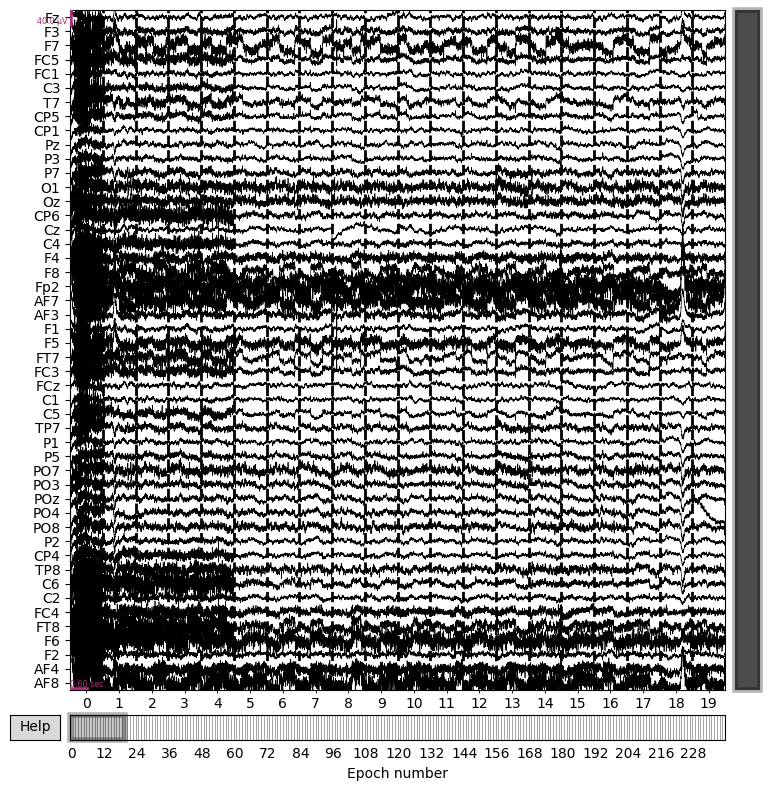

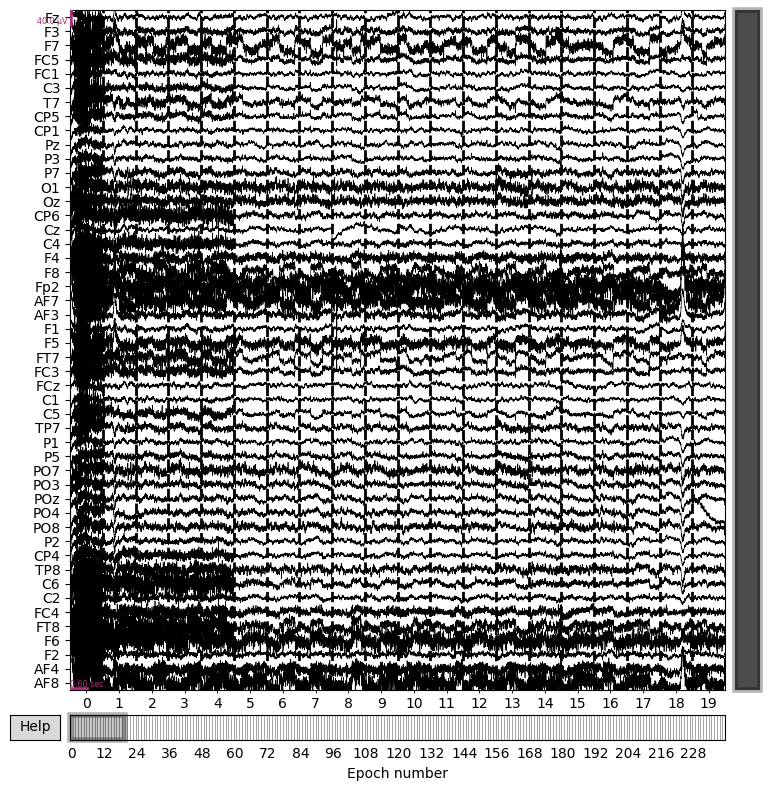

In [231]:
subj5_epochs.plot(n_channels=50, block=True)

### Subject 6 (Male/Happy Stimulus)

In [232]:
subj6_raw = mne.io.read_raw_fif('subj8_exp2_male_happy_filtered.fif', preload = True)
print(subj6_raw.info) # no event data contained in raw object

Opening raw data file subj8_exp2_male_happy_filtered.fif...
    Range : 0 ... 1283749 =      0.000 ...  2567.498 secs
Ready.
Reading 0 ... 1283749  =      0.000 ...  2567.498 secs...


C:\Users\burni\AppData\Local\Temp\ipykernel_16192\1804595545.py:1: RuntimeWarning: This filename (subj8_exp2_male_happy_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  subj6_raw = mne.io.read_raw_fif('subj8_exp2_male_happy_filtered.fif', preload = True)


<Info | 11 non-empty values
 bads: []
 ch_names: Fz, F3, F7, Below Eye, FC5, FC1, C3, T7, Left Mastoid, CP5, CP1, ...
 chs: 48 EEG, 7 misc
 custom_ref_applied: True
 dig: 51 items (3 Cardinal, 48 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 55
 projs: []
 sfreq: 500.0 Hz
>


In [233]:
# need to find event information
events6, event6_id = mne.events_from_annotations(subj6_raw) # 2.24 seconds between events - epoch to the SCD
print(events6) # 961 events detected
print(event6_id)

Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S  4', 'S  7', 'S  8', 'S  9', 'S 12', 'S 13', 'S 14', 'S 15', 'S 16', 'S 21', 'S 23', 'S 24', 'S 25', 'S 26', 'S 31', 'S 32', 'S 34', 'S 35', 'S 36', 'S 41', 'S 42', 'S 43', 'S 45', 'S 46', 'S 51', 'S 52', 'S 53', 'S 54', 'S 56', 'S 61', 'S 62', 'S 63', 'S 64', 'S 65', 'S101', 'S102', 'S103', 'S104', 'S105', 'S116', 'S125', 'S134', 'S143', 'S152', 'S161', 'S201', 'S202', 'S203', 'S204', 'S205', 'boundary']
[[      0       0      54]
 [ 193398       0      52]
 [ 372126       0      53]
 [ 384274       0      43]
 [ 386129       0      38]
 [ 386346       0       6]
 [ 387374       0      46]
 [ 388229       0      40]
 [ 388501       0       6]
 [ 389530       0      47]
 [ 391173       0      39]
 [ 391436       0       7]
 [ 392464       0      44]
 [ 393023       0      41]
 [ 393255       0       7]
 [ 394283       0      48]
 [ 396310       0      42]
 [ 396513       0       5]
 [ 397541       0      45]
 [ 398395       0  

In [234]:
subj6_events_raw = pd.read_csv('sub-008_eeg_sub-008_task-PST_events.tsv', sep='\t', header=0)
events6 = events6[subj6_events_raw['trial_type'].str.contains("STIM:") == True]

In [235]:
subj6_epochs = mne.Epochs(subj6_raw, events6, tmin = 0, tmax = 1.2, baseline = (0, 1.2), preload = True)

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 601 original time points ...
0 bad epochs dropped


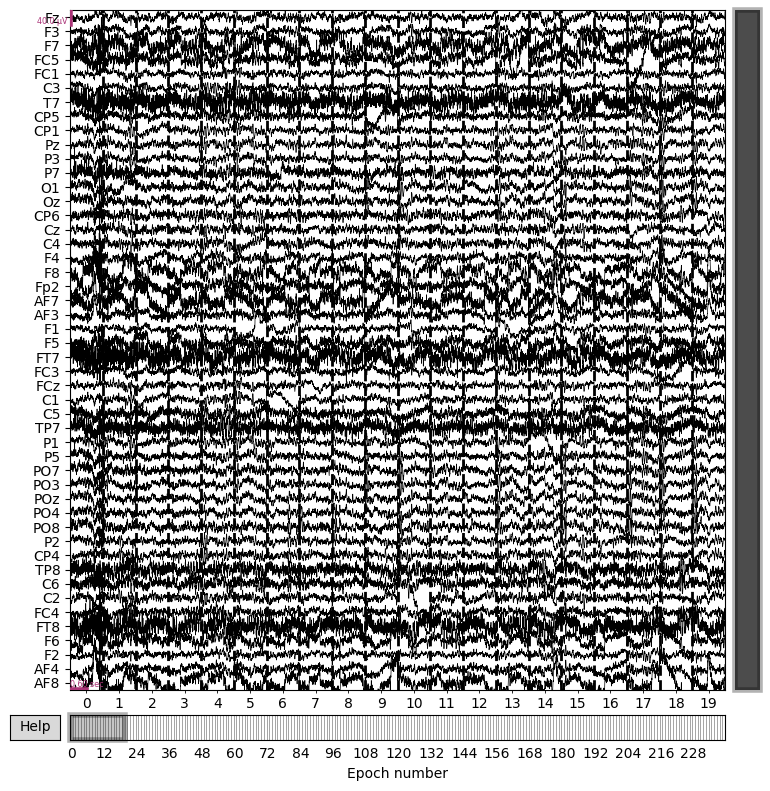

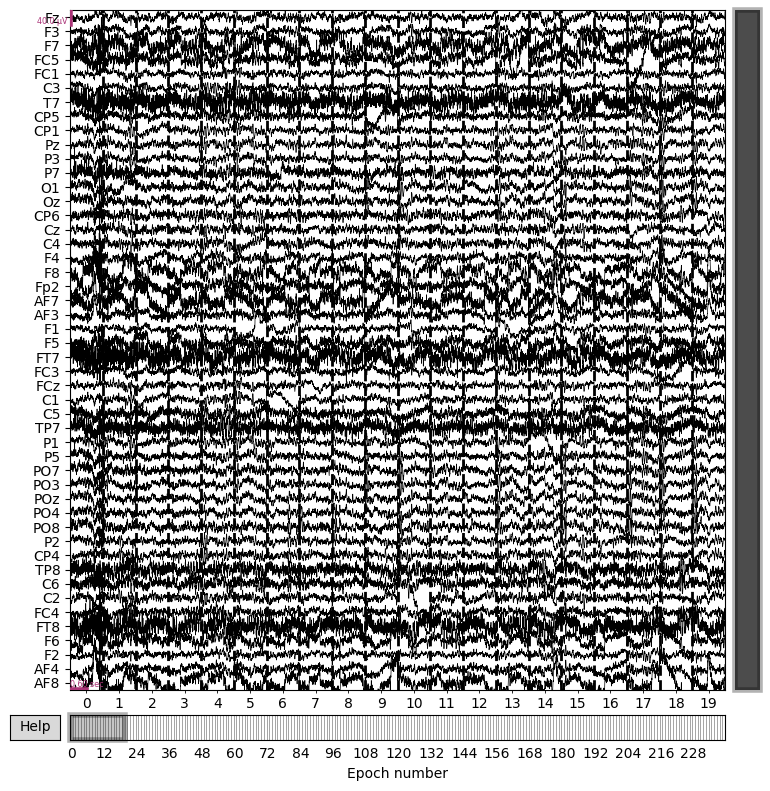

In [236]:
subj6_epochs.plot(n_channels=50, block=True)